# 1. 라이브러리

In [2]:
import os

import numpy as np
import pandas as pd # 여기에 있으면 안됨. 함수화 필요
import matplotlib.pyplot as plt

from data_engineering.dataset.precendent.data_pipeline import Pipelines

In [3]:
import matplotlib.font_manager as fm
import matplotlib as mpl
font_path = './NanumGothicLight.otf'
fm.fontManager.addfont(font_path) 
mpl.rcParams['font.family'] = 'NanumGothicOTF'
mpl.rcParams['axes.unicode_minus'] = False



import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# 2. 목적

결측치 처리를 위한 분석, 이후 프롬프트 엔지니어링을 위함
1. 결측치 추가 탐색
2. 결측치 연관성 분석

# 3. 데이터

EDA 후 꼭 필요한 처리를 한 데이터 사용

In [4]:
path_train = "/workspace/Storage/hansoldeco3/Data/raw/train.csv"
train = pd.read_csv(path_train)
train = Pipelines.pipeline_1(train)

In [5]:
train.columns

Index(['발생일시', '시간대', '계절', '사고인지 시간', '사고인지시차', '근무종류', '날씨', '기온', '습도',
       '공사종류_대분류', '공사종류_중분류', '공사종류_소분류', '연면적', '지상', '지하', '인적사고', '물적사고',
       '공종_대분류', '공종_소분류', '사고객체_대분류', '사고객체_소분류', '작업프로세스', '장소', '부위2',
       '사고원인', '재발방지대책 및 향후조치계획'],
      dtype='object')

# 4. 분석

## 4.1 개별 변수 분석

### 4.1.1 발생일시

In [5]:
col ='발생일시'

결측 수

In [6]:
train[col].isna().sum()

0

카테고리

In [7]:
train[col].value_counts()

발생일시
2023-11-08 10:00:00    6
2023-05-26 14:00:00    6
2021-12-16 10:00:00    6
2022-10-17 10:00:00    6
2023-05-18 10:00:00    5
                      ..
2022-07-04 05:25:00    1
2022-07-04 07:30:00    1
2022-07-04 08:50:00    1
2022-07-04 09:03:00    1
2022-07-03 10:30:00    1
Name: count, Length: 20128, dtype: int64

- 특이사항 없음

### 4.1.2 사고인지 시간

In [8]:
col ='사고인지 시간'

결측 수

In [9]:
train[col].isna().sum()

23088

카테고리

In [10]:
train[col].value_counts()

사고인지 시간
2019-11-08 09:00:00    2
2020-07-03 14:00:00    2
2019-10-26 16:49:00    1
2019-10-28 16:00:00    1
2019-11-29 18:21:00    1
                      ..
2020-05-04 10:00:00    1
2020-05-04 16:01:00    1
2020-05-11 17:10:00    1
2020-06-24 17:00:00    1
2020-04-28 13:35:00    1
Name: count, Length: 332, dtype: int64

- feature engineering에서 사고 인지시간과 조치내용의 연관성을 확인해보면 좋을 듯. 너무 늦게 발견할 경우 따로 조치가 필요할 것으로 보이므로

### 4.1.3 근무종류

In [11]:
col ='근무종류'

결측 수

In [12]:
train[col].isna().sum()

3126

카테고리

In [13]:
train[col].value_counts()

근무종류
정규작업       17811
기타           688
휴일근무         623
작업 전         524
식사ㆍ휴식 등      273
출ㆍ퇴근 등       160
불류불능         114
연장근무         103
Name: count, dtype: int64

- 기타는 결측 처리 필요. 다른 카테고리에 속하지 않는다는 정보 가지고 현재 할 수 있는게 없음

### 4.1.4 날씨

In [14]:
col ='날씨'

결측 수

In [15]:
train[col].isna().sum()

0

카테고리

In [16]:
train[col].value_counts()

날씨
맑음    17782
흐림     4260
강우     1073
안개      172
강설       97
강풍       38
Name: count, dtype: int64

- 특이사항 없음

### 4.1.5 기온

In [17]:
col ='기온'

결측 수

In [18]:
train[col].isna().sum()

728

카테고리

In [19]:
train[col].value_counts()

기온
 20.0    1379
 25.0    1288
 15.0    1044
 10.0    1011
 28.0     966
         ... 
-4.2        1
 20.6       1
 26.7       1
 26.2       1
 29.1       1
Name: count, Length: 335, dtype: int64

- 특이사항 없음

### 4.1.6 습도

In [20]:
col ='습도'

결측 수

In [21]:
train[col].isna().sum()

3

카테고리

In [22]:
train[col].value_counts()

습도
50.0    2624
60.0    2575
30.0    1587
40.0    1470
70.0    1378
        ... 
69.3       1
47.9       1
78.1       1
54.3       1
72.4       1
Name: count, Length: 164, dtype: int64

- 특이사항 없음

### 4.1.7 공사종류_대분류

In [23]:
col ='공사종류_대분류'

결측 수

In [24]:
train[col].isna().sum()

0

카테고리

In [25]:
train[col].value_counts()

공사종류_대분류
건축        17728
토목         4599
산업환경설비      893
조경          202
Name: count, dtype: int64

- 특이사항 없음

### 4.1.8 공사종류_중분류

In [26]:
col ='공사종류_중분류'

결측 수

In [27]:
train[col].isna().sum()

1

카테고리

In [28]:
train[col].value_counts()

공사종류_중분류
건축물          17727
상하수도          1091
도로            1056
기타             649
발전시설           528
교량             426
터널             361
하천             358
철도             279
항만             217
옹벽 및 절토사면      197
환경시설           196
산업생산시설         169
공원              66
댐               60
숲               15
공동구             11
정원              10
생태공원             4
수목원              1
Name: count, dtype: int64

In [29]:
train[train[col]=='기타']['공사종류_대분류'].value_counts()

공사종류_대분류
토목    543
조경    106
Name: count, dtype: int64

In [30]:
train[train[col]=='기타']['공사종류_소분류'].value_counts()

공사종류_소분류
부지조성    483
간척매립     22
Name: count, dtype: int64

- 기타는 결측 처리 필요. 다른 카테고리에 속하지 않는다는 정보 가지고 현재 할 수 있는게 없음.

### 4.1.9 공사종류_소분류

In [31]:
col ='공사종류_소분류'

결측 수

In [32]:
train[col].isna().sum()

816

카테고리

In [33]:
for c in train[col].value_counts().index:
    print(c)

공동주택
공장
업무시설
교육연구시설
근린생활시설
기타
도로
창고시설
하수도
부지조성
문화 및 집회시설
상수도
숙박시설
도로교량
단독주택
운동시설
의료시설
교정 및 군사시설
자동차 관련시설
노유자시설
판매시설
석유화학공장
지하철
종교시설
도로터널
운수시설
철도터널
옹벽
제방(통관/호안)
일반 및 고속철도
하수처리시설
방파제
방송통신시설
절토사면
위험물 저장 및 처리시설
계류시설
관개수로
철도교량
관광 휴게시설
수련시설
환경오염방지시설
용수전용댐
소각장
호안
동물 및 식물 관련시설
공공폐수처리시설
간척매립
배수펌프장
지하차도
수처리설비시설
수문/통문
보
묘지관련시설
다목적댐
장례시설
위락시설
제철공장
갑문
중수도/하폐수처리수 재이용시설
파제제
홍수전용댐
지하도상가
복개구조물


In [34]:
train[train[col]=='기타']['공사종류_대분류'].value_counts()

공사종류_대분류
토목    705
건축    473
Name: count, dtype: int64

In [35]:
train[train[col]=='기타']['공사종류_중분류'].value_counts()

공사종류_중분류
건축물          473
상하수도         162
하천           154
도로           147
항만            68
교량            44
터널            44
철도            37
옹벽 및 절토사면     33
댐             16
Name: count, dtype: int64

- 기타는 결측 처리 필요. 다른 카테고리에 속하지 않는다는 정보 가지고 현재 할 수 있는게 없음.

### 4.1.10 연면적

In [36]:
col ='연면적'

결측 수

In [37]:
train[col].isna().sum()

8088

카테고리

In [38]:
train[col].value_counts()

연면적
505565.00    99
697000.00    91
0.00         60
429752.00    52
79634.00     47
             ..
1949.00       1
44368.00      1
2864.50       1
2685.90       1
8535.65       1
Name: count, Length: 8526, dtype: int64

- 0 결측처리, 피쳐엔지니어링 시 안전조치 가이드라인에서 연면적 기준 찾으면 좋을 듯

### 4.1.11 지상

In [39]:
col ='지상'

결측 수

In [40]:
train[col].isna().sum()

8200

카테고리

In [41]:
train[col].value_counts()

지상
4.0      1720
3.0      1321
2.0      1309
29.0      952
5.0       939
1.0       885
20.0      707
25.0      688
15.0      553
10.0      524
7.0       459
6.0       436
9.0       377
8.0       359
12.0      270
35.0      265
49.0      257
18.0      254
27.0      223
28.0      197
24.0      190
23.0      175
14.0      169
11.0      159
19.0      124
0.0       123
16.0      117
13.0      113
34.0      110
22.0      104
26.0       98
30.0       95
21.0       84
36.0       79
17.0       75
32.0       67
43.0       67
38.0       65
33.0       60
47.0       53
45.0       53
48.0       47
44.0       47
39.0       46
40.0       44
42.0       42
41.0       35
37.0       31
31.0       22
59.0       14
46.0       11
69.0        2
70.0        1
57.0        1
105.0       1
254.0       1
101.0       1
65.0        1
Name: count, dtype: int64

In [42]:
len(train[(train[col]==0) &(train['연면적']==0)])

35

### 4.1.12 지하

In [43]:
col ='지하'

결측 수

In [44]:
train[col].isna().sum()

8200

카테고리

In [45]:
train[col].value_counts()

지하
1.0     4230
2.0     3418
0.0     2795
3.0     1675
4.0     1180
5.0      795
6.0      380
7.0      175
29.0      57
20.0      56
8.0       50
25.0      46
35.0      35
9.0       31
10.0      31
15.0      27
49.0      24
27.0      22
12.0      17
11.0      16
23.0      14
28.0      10
24.0      10
37.0       9
18.0       9
14.0       8
19.0       8
34.0       7
33.0       7
43.0       6
26.0       6
36.0       6
13.0       6
38.0       5
17.0       5
39.0       5
48.0       4
22.0       4
16.0       4
47.0       4
40.0       4
32.0       3
21.0       3
46.0       3
44.0       3
42.0       3
30.0       2
31.0       1
41.0       1
61.0       1
45.0       1
Name: count, dtype: int64

In [46]:
len(train[(train['지하']==0)])

2795

In [47]:
len(train[(train['지상']==0)])

123

In [48]:
len(train[(train['지하']==0) &(train['연면적']==0)])

48

In [49]:
len(train[(train['지상']==0) &(train['연면적']==0)])

35

In [50]:
len(train[(train['지상']==0) & (train['지하']==0)])

44

In [51]:
len(train[(train['지상']==0) & (train['연면적']==0) & (train['지하']==0)])

35

- 연면적, 지상, 지하 전부 0인 경우 존재, 이 케이스만 결측처리

### 4.1.13 인적사고

In [52]:
col ='인적사고'

결측 수

In [53]:
train[col].isna().sum()

32

카테고리

In [54]:
train[col].value_counts()

인적사고
물체에 맞음                   3460
끼임                       2549
넘어짐(미끄러짐)                2188
넘어짐(기타)                  2063
기타                       1915
부딪힘                      1815
떨어짐(2미터 미만)              1735
절단, 베임                   1661
넘어짐(물체에 걸림)              1490
떨어짐(2미터 이상 ~ 3미터 미만)      759
떨어짐(분류불능)                 708
떨어짐(3미터 이상 ~ 5미터 미만)      545
깔림                        514
질병                        383
찔림                        306
떨어짐(5미터 이상 ~ 10미터 미만)     298
분류불능                      225
떨어짐(10미터 이상)              210
없음                        196
화상                        181
교통사고                      122
감전                         49
질식                         18
Name: count, dtype: int64

- 기타, 분류불능 결측처리

### 4.1.14 물적사고

In [55]:
col ='물적사고'

결측 수

In [56]:
train[col].isna().sum()

1490

카테고리

In [57]:
train[col].value_counts()

물적사고
없음       20214
기타         599
전도         360
낙하         310
충돌         199
붕괴          71
파열,파단       64
탈락          60
화재          48
폭발           7
Name: count, dtype: int64

- 기타 결측처리

### 4.1.15 공종_대분류

In [58]:
col ='공종_대분류'

결측 수

In [59]:
train[col].isna().sum()

11

카테고리

In [60]:
train[col].value_counts()

공종_대분류
건축      14251
토목       5245
기타       2066
기계설비     1000
전기설비      529
산업설비      311
통신설비        9
Name: count, dtype: int64

In [61]:
train[train['공종_대분류']=='기타']['공종_소분류'].value_counts()

공종_소분류
기타    2066
Name: count, dtype: int64

- 기타 결측처리

### 4.1.16 공종_소분류

In [62]:
col ='공종_소분류'

결측 수

In [63]:
train[col].isna().sum()

11

카테고리

In [64]:
train[col].value_counts()

공종_소분류
철근콘크리트공사        7059
가설공사            2520
기타              2066
해체 및 철거공사       1037
기계설비공사           939
토공사              907
철골공사             781
건축물 부대공사         646
수장공사             593
관공사              552
건축 토공사           551
미장공사             536
전기설비공사           507
타일 및 돌공사         449
도로 및 포장공사        402
교량공사             344
조적공사             330
도장공사             296
터널공사             288
산업설비공사           285
목공사              275
금속공사             265
창호 및 유리공사        242
하천공사             226
방수공사             211
관공사 부대공사         197
항만공사             164
지붕 및 홈통공사        160
말뚝공사             118
철도 및 궤도공사        115
지정공사              95
조경공사              64
지반개량공사            50
강구조물공사            45
지반조사              37
프리캐스트 콘크리트공사      21
댐 및 제방공사          19
특수 건축물공사          10
통신설비공사             9
Name: count, dtype: int64

In [65]:
train[train['공종_소분류']=='기타']['공종_대분류'].value_counts()

공종_대분류
기타    2066
Name: count, dtype: int64

- 기타 결측처리

### 4.1.17 사고객체_대분류

In [66]:
col ='사고객체_대분류'

결측 수

In [67]:
train[col].isna().sum()

687

카테고리

In [68]:
train[col].value_counts()

사고객체_대분류
가시설        6584
건설자재       4533
기타         4450
건설공구       2445
건설기계       1864
부재          980
시설물         971
토사 및 암반     530
질병          378
Name: count, dtype: int64

In [69]:
train[train['사고객체_대분류']=='기타']['사고객체_소분류'].value_counts()

사고객체_소분류
기타        3863
차량         187
건설폐기물      104
작업대차        84
전주, 전선      74
지하매설물       67
비산물         64
유증기          7
Name: count, dtype: int64

In [70]:
for i in  train[train['사고객체_소분류']=='기타']['사고객체_대분류'].value_counts().index:
    print(i)
    print(train[train['사고객체_대분류']==i]['사고객체_소분류'].value_counts())

기타
사고객체_소분류
기타        3863
차량         187
건설폐기물      104
작업대차        84
전주, 전선      74
지하매설물       67
비산물         64
유증기          7
Name: count, dtype: int64


- 기타 결측처리

### 4.1.18 사고객체_소분류

In [71]:
col ='사고객체_소분류'

결측 수

In [72]:
train[col].isna().sum()

687

카테고리

In [73]:
train[col].value_counts()

사고객체_소분류
기타         3863
자재         2767
공구류        1997
거푸집        1821
비계         1346
           ... 
아스팔트피니셔       1
골재살포기         1
클라이밍콘         1
노상안정기         1
슬레이트          1
Name: count, Length: 120, dtype: int64

In [74]:
train[train['사고객체_소분류']=='기타']['사고객체_대분류'].value_counts()

사고객체_대분류
기타    3863
Name: count, dtype: int64

In [75]:
for i in  train[train['사고객체_대분류']=='기타']['사고객체_소분류'].value_counts().index:
    print(i)
    print(train[train['사고객체_소분류']==i]['사고객체_대분류'].value_counts())

기타
사고객체_대분류
기타    3863
Name: count, dtype: int64
차량
사고객체_대분류
기타    187
Name: count, dtype: int64
건설폐기물
사고객체_대분류
기타    104
Name: count, dtype: int64
작업대차
사고객체_대분류
기타    84
Name: count, dtype: int64
전주, 전선
사고객체_대분류
기타    74
Name: count, dtype: int64
지하매설물
사고객체_대분류
기타    67
Name: count, dtype: int64
비산물
사고객체_대분류
기타    64
Name: count, dtype: int64
유증기
사고객체_대분류
기타    7
Name: count, dtype: int64


- 기타 결측처리

### 4.1.19 작업프로세스

In [76]:
col ='작업프로세스'

결측 수

In [77]:
train[col].isna().sum()

63

카테고리

In [78]:
train[col].value_counts()

작업프로세스
설치작업           4117
이동             2506
해체작업           2503
운반작업           2057
정리작업           1526
기타             1509
조립작업           1130
형틀 및 목공         915
타설작업            797
마감작업            780
절단작업            677
준비작업            594
설비작업            356
청소작업            306
도장작업            282
굴착작업            276
용접작업            249
연결작업            245
상차 및 하역작업       244
인양작업            236
양중작업            172
확인 및 점검작업       169
쌓기작업            155
보수 및 교체작업       153
매설작업            152
천공작업            151
전기작업            128
부설 및 다짐작업       114
정비작업            113
반출작업            102
벌목작업             98
항타 및 항발작업        96
거치작업             81
적재작업             72
고소작업             49
절취작업             47
물뿌리기 작업          39
양생작업             35
측량작업             29
장약 및 발파작업        23
철근조립작업           16
인발작업             15
자재이동             11
자재정리              4
장비이동              4
철거작업              4
고정작업              3
작업장 출입            3
정지작업              2
점검           

- 기타 결측처리

### 4.1.20 장소

In [79]:
col ='장소'

결측 수

In [80]:
train[col].isna().sum()

0

카테고리

In [81]:
train[col].value_counts()

장소
공동주택 / 내부            3548
공동주택 / 외부            1867
공장 / 내부              1103
업무시설 / 내부            1032
공동주택 /                877
                     ... 
기타 / 중랑천 농구장            1
업무시설 / 가설통로             1
공동주택 / 위험물 저장소          1
도로 / 죽림동 산52-7 일원       1
교육연구시설 / 피트             1
Name: count, Length: 1829, dtype: int64

In [82]:
train[train[col].map(lambda x: '기타' in x[x.find('/'):])][col]

ID
TRAIN_05705      공장 / 기타
TRAIN_06817    공동주택 / 기타
TRAIN_08042    공동주택 / 기타
TRAIN_09810    업무시설 / 기타
TRAIN_10403      기타 / 기타
TRAIN_10832    공동주택 / 기타
TRAIN_12163    공동주택 / 기타
TRAIN_15227    공동주택 / 기타
TRAIN_15331    공동주택 / 기타
TRAIN_19320    공동주택 / 기타
Name: 장소, dtype: object

- 전처리로 /랑 기타 지우면 될 듯

### 4.1.21 부위1

In [83]:
col ='부위1'

결측 수

In [84]:
train[col].isna().sum()

687

카테고리

In [85]:
train[col].value_counts()

부위1
기타         3863
자재         2767
공구류        1997
거푸집        1821
비계         1346
           ... 
아스팔트피니셔       1
골재살포기         1
클라이밍콘         1
노상안정기         1
슬레이트          1
Name: count, Length: 120, dtype: int64

In [86]:
train[['사고객체_소분류','부위1','부위2']]

,사고객체_소분류,부위1,부위2
ID,,,
TRAIN_00000,철근,철근,고소
TRAIN_00001,볼트,볼트,바닥
TRAIN_00002,기타,기타,바닥
TRAIN_00003,교각 기초,교각 기초,바닥
TRAIN_00004,건설폐기물,건설폐기물,바닥
...,...,...,...
TRAIN_23417,거푸집,거푸집,NaN
TRAIN_23418,사다리,사다리,상부(위)
TRAIN_23419,강관동바리,강관동바리,NaN


In [87]:
train[train['사고객체_소분류'] != train['부위1']][['사고객체_소분류','부위1']]

,사고객체_소분류,부위1
ID,,
TRAIN_02895,NaN,NaN
TRAIN_04081,NaN,NaN
TRAIN_04420,NaN,NaN
TRAIN_04562,NaN,NaN
TRAIN_04870,NaN,NaN
...,...,...
TRAIN_23363,NaN,NaN
TRAIN_23380,NaN,NaN
TRAIN_23386,NaN,NaN


In [88]:
train[train['사고객체_소분류'] != train['부위1']][['사고객체_소분류','부위1']].isna().sum()

사고객체_소분류    687
부위1         687
dtype: int64

- 부위1은 drop해도 될 것으로 보임

### 4.1.22 부위2

In [89]:
col ='부위2'

결측 수

In [90]:
train[col].isna().sum()

3167

카테고리

In [91]:
train[col].value_counts()

부위2
바닥                      7337
상부(위)                   3774
하부(아래)                  1329
옆                       1301
지하                      1253
                        ... 
101~102동 사이 지하주차장 상부       1
짐칸                         1
벽체 작업                      1
왼쪽발목                       1
태양열 기초 패드                  1
Name: count, Length: 2602, dtype: int64

- 부위2는 추가분석 필요

### 4.1.23 사고원인

In [92]:
col ='사고원인'

결측 수

In [93]:
train[col].isna().sum()

90

카테고리

In [94]:
train[col].value_counts()

사고원인
작업자 부주의                                                                     280
작업자의 단순과실                                                                   107
부주의                                                                          78
작업자 단순과실                                                                     66
작업자의 부주의                                                                     55
                                                                           ... 
벌목작업중 지반에서 미끄러져 조작중이던 전기톱을 놓쳐 전기톱이 바닥에서 반발하여 재해자의 좌측얼굴부를 타격해 창상을 입은 재해임.      1
작업방법 불량(말비계 위에서 불안전한 자세로 작업), 컬럼 위치 조정시 근로자 작업 위치 부적절                         1
손가락 베임: 그라인더날 파손(불량)으로 인해 파편의 튐                                               1
작업자의 단순과실로 인한 바닥헛딛음.                                                          1
작업자의 과실로 인한 맨홀뚜껑 낙하                                                           1
Name: count, Length: 22070, dtype: int64

- 특이사항 없음

### 4.1.24 재발방지대책 및 향후조치계획

In [95]:
col ='재발방지대책 및 향후조치계획'

결측 수

In [96]:
train[col].isna().sum()

0

카테고리

In [97]:
train[col].value_counts()

재발방지대책 및 향후조치계획
안전교육 실시를 통한 재발 방지 대책 및 향후 조치 계획.                                                                                                                                                                                                           76
작업자 안전교육 실시를 통한 재발 방지 대책 및 향후 조치 계획.                                                                                                                                                                                                       53
안전관리교육철저에 대한 재발 방지 대책과 향후 조치 계획.                                                                                                                                                                                                           39
안전교육 철저에 대한 재발 방지 대책과 향후 조치 계획.                                                                                                                                                                                                            36
동일한 사고가 발생하지 않도록 안전교육 실시.       

- 특이사항 없음

## 4.2 전처리

- 결측관련
    - 근무종류 : 기타는 결측 처리 필요. 다른 카테고리에 속하지 않는다는 정보 가지고 현재 할 수 있는게 없음
    - 공사종류_중분류 : 기타는 결측 처리 필요. 다른 카테고리에 속하지 않는다는 정보 가지고 현재 할 수 있는게 없음
    - 공사종류_소분류 : 기타는 결측 처리 필요. 다른 카테고리에 속하지 않는다는 정보 가지고 현재 할 수 있는게 없음
    - 연면적, 지상, 지하 전부 0인 경우 존재, 이 케이스만 결측처리
    - 인적사고 : 기타, 분류불능 결측처리
    - 물적사고 : 기타 결측처리
    - 공종_대분류 : 기타 결측처리
    - 공종_소분류 : 기타 결측처리
    - 사고객체_대분류 : 기타 결측처리
    - 사고객체_소분류 : 기타 결측처리
    - 작업프로세스 : 기타 결측처리
    - 장소 : string 내 /, 기타 지우기
    - 부위1 : drop col
- 그 외
    - 사고인지 시간 : feature engineering에서 사고 인지시간과 조치내용의 연관성을 확인해보면 좋을 듯. 너무 늦게 발견할 경우 따로 조치가 필요할 것으로 보이므로
    - 부위2 : 추가분석 필요


In [98]:
def preprocess_wt_1(df):
    col = '근무종류'
    df_ = df.copy()
    df_[col] = df_[col].replace("기타", np.nan)
    return df_

def preprocess_ct2_1(df):
    col = '공사종류_중분류'
    df_ = df.copy()
    df_[col] = df_[col].replace("기타", np.nan)
    return df_

def preprocess_ct3_1(df):
    col = '공사종류_중분류'
    df_ = df.copy()
    df_[col] = df_[col].replace("기타", np.nan)
    return df_

def preprocess_areafloor(df):
    col1 = '연면적'
    col2 = '지상'
    col3 = '지하'
    df_ = df.copy()
    mask = (df_[[col1, col2, col3]] == 0).all(axis=1)
    df_.loc[mask, [col1, col2, col3]] = np.nan
    return df_

def preprocess_hd_1(df):
    col = '인적사고'
    df_ = df.copy()
    df_[col] = df_[col].replace("기타", np.nan)
    df_[col] = df_[col].replace("분류불능", np.nan)
    return df_

def preprocess_md_1(df):
    col = '물적사고'
    df_ = df.copy()
    df_[col] = df_[col].replace("기타", np.nan)
    return df_

def preprocess_mt1_1(df):
    col = '공종_대분류'
    df_ = df.copy()
    df_[col] = df_[col].replace("기타", np.nan)
    return df_

def preprocess_mt2_1(df):
    col = '공종_소분류'
    df_ = df.copy()
    df_[col] = df_[col].replace("기타", np.nan)
    return df_

def preprocess_ao1_1(df):
    col = '사고객체_대분류'
    df_ = df.copy()
    df_[col] = df_[col].replace("기타", np.nan)
    return df_

def preprocess_ao2_1(df):
    col = '사고객체_소분류'
    df_ = df.copy()
    df_[col] = df_[col].replace("기타", np.nan)
    return df_

def preprocess_wp_1(df):
    col = '작업프로세스'
    df_ = df.copy()
    df_[col] = df_[col].replace("기타", np.nan)
    return df_

def preprocess_place_1(df):
    col = '장소'
    df_ = df.copy()
    df_[col] = df_[col].map(lambda x: x.replace('/','').replace('/','기타').strip())
    df_[col] = df_[col].replace('',np.nan)
    return df_

def preprocess_part_1(df):
    col = '부위1'
    df_ = df.copy()
    df_ = df_.drop(col, axis=1)
    return df_

In [99]:
def pipeline_new(df):
    df = preprocess_wt_1(df)
    df = preprocess_ct2_1(df)
    df = preprocess_ct3_1(df)
    df = preprocess_areafloor(df)
    df = preprocess_hd_1(df)
    df = preprocess_md_1(df)
    df = preprocess_mt1_1(df)
    df = preprocess_mt2_1(df)
    df = preprocess_ao1_1(df)
    df = preprocess_ao2_1(df)
    df = preprocess_wp_1(df)
    df = preprocess_part_1(df)
    df = preprocess_place_1(df)
    return df

In [100]:
processed_1 = pipeline_new(train)

## 4.3 결측 분석

In [101]:
from typing import List, Iterable, Union

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, kruskal, f_oneway, kstest


def is_associated_categorical_numeric(groups: List[Iterable[Union[int, float]]]) -> bool:
    '''
    뉴메릭 데이터와 카테고리컬 데이터의 연관성 여부 체크
    세부 요구사항 명시해야 함
    '''
    parametric = True
    equal_var = False   
    # groups 결과에 따른 대처
    if len(groups)==1:
        return None
    lengroups = list(map(len, groups))
    if 0 in lengroups:
        pass
    if any(map(lambda x: x<100, lengroups)):
        parametric = False
    else:
        # 정규성검정
        normality = [shapiro(group)[1] if len(group) < 5000 else kstest(group, 'norm')[1] for group in groups] # 최대표본크기 적용
        normality = [0 if p_value < 0.05 else 1 for p_value in normality] # 유의수준준
        if sum(normality) != len(normality):
            parametric = False
    if parametric:
        stat, p_value = levene(*groups)
        if p_value < 0.05:
            equal_var = False
        else:
            equal_var = True

    # 그룹 수, 정규성에 따라 검정 방법 달라짐(t-test, mann, anova, kruskal)
    if len(groups)==2:
        if parametric:
            stat, p_value_ass = ttest_ind(*groups, equal_var = equal_var)
        else:
            stat, p_value_ass = mannwhitneyu(*groups, alternative='two-sided')
    else:
        if parametric:
            if equal_var:
                stat, p_value_ass = f_oneway(*groups)
            else:
                pass
        else:
            stat, p_value_ass = kruskal(*groups)
            
    # 그룹 간 차이가 유의하게 날 경우 연관성 있는 것으로 판단단
    if p_value_ass < 0.05:
        return True
    else:
        return False

In [102]:
from typing import Iterable, Union

from scipy.stats import pearsonr, spearmanr, kendalltau


# Shannon 엔트로피 계산
def entropy(data, bins):
    hist, _ = np.histogram(data, bins=bins)
    probs = hist / np.sum(hist)
    return -np.sum(probs * np.log(probs + 1e-9))  # log(0) 방지

# 공동 엔트로피 계산
def joint_entropy(x, y, bins):
    hist2d, _, _ = np.histogram2d(x, y, bins=bins)
    probs = hist2d / np.sum(hist2d)
    return -np.sum(probs * np.log(probs + 1e-9))

# Mutual Information 계산
def mutual_information(x, y, bins):
    h_x = entropy(x, bins)
    h_y = entropy(y, bins)
    h_xy = joint_entropy(x, y, bins)
    return h_x + h_y - h_xy

# MIC 계산
def calculate_mic(x, y, max_bins=20):
    max_mi = 0
    for bins in range(2, max_bins + 1):
        mi = mutual_information(x, y, bins)
        max_mi = max(max_mi, mi)
    # 정규화 (최대 엔트로피로 나눔)
    norm_mic = max_mi / np.log(min(len(x), len(y)))
    return norm_mic

def is_associated_numeric(s1:Iterable[Union[int, float]], s2:Iterable[Union[int, float]]) -> bool:
    '''
    두 뉴메릭 데이터의 연관성 여부 체크
    세부 요구사항 명시해야 함
    추후 전략을 바꿀 수 있음
    '''
    # Pearson
    pearson_corr, pearson_p = pearsonr(s1, s2)
    
    # Spearman
    spearman_corr, spearman_p = spearmanr(s1, s2)
    
    # Kendall
    kendall_corr, kendall_p = kendalltau(s1, s2)
    
    # MIC
    s = filter(lambda x: ~np.isnan(x[0] + x[1]), zip(s1, s2))
    s1_, s2_ = zip(*s)
    mic_corr = calculate_mic(s1_, s2_)

    result = {
        "pearson":(pearson_corr, pearson_p),
        "spearman":(spearman_corr, spearman_p),
        "kendall":(kendall_corr, kendall_p),
        "mic":mic_corr,
    }

    # 해석
    analysis_pearson = True if abs(result['pearson'][0]) > 0.3 and result['pearson_p'][1] < 0.05 else False
    analysis_spearman = True if abs(result['spearman'][0]) > 0.3 and result['spearman_p'][1] < 0.05 else False
    analysis_kendall = True if abs(result['kendall'][0]) > 0.2 and result['kendall_p'][1] < 0.05 else False
    analysis_mic = True if abs(result['mic']) > 0.3 else False
    analysis = any([analysis_pearson, analysis_spearman, analysis_kendall, analysis_mic])
    
    return analysis

In [103]:
from typing import Iterable, Union
import itertools

from scipy.stats import chi2_contingency


def is_associated_categorical(s1:Iterable[Union[int, float]], s2:Iterable[Union[int, float]]) -> bool:
    '''
    두 카테고리컬 데이터의 연관성 여부 체크
    세부 요구사항 명시해야 함
    '''
    ct = pd.crosstab(s1, s2)
    chi2, p, dof, expected = chi2_contingency(ct)
    n = ct.sum().sum()  # 전체 샘플 수
    cramers_v = np.sqrt(chi2 / (n * (min(ct.shape) - 1)))

    if p< 0.05 and cramers_v>0.4: # 중간 강도 이상의 연관성만 체크
        # print(f"{col1}, {col2} 연관성 존재")
        # print(f"Cramér's V: {cramers_v}")
        return True
    else:
        # print(f"{col1}, {col2} 연관성 없음")
        return False

def is_associated(df:pd.DataFrame, meta:dict, col1:str, col2:str):
    '''
    연관성 체크하는 방법은 조건이나 목적에 따라 여러가지가 있는데, 메타데이터 보고 이걸 판단해주고 실행하기 위한 함수
    데이터 자체에 대한 관리는 일단 판다스 dataframe에 맡긴다...
    메타데이터는 dict이고 json으로 저장되며 정해진 규칙을 따름. EDA1에서 추가로 모수, 비모수 여부도 넣어야 할 듯.
    일단 한번에 하는 함수로 남기고 필요시 나중에 EDA자동화로 결과 데이터 디파인된 방식으로 저장 후 해석따로하도록 고도화
    지금 이 상태의 문제는, 분석 별 요구사항이 달라 결측처리 등 대처도 다른데 함수하나 안에 묶어놓았다는 점
    '''
    type1_col1 = meta[col1]["type"]
    type1_col2 = meta[col2]["type"]

    case_dict = {
        "ordinal" : ['numeric', 'categorical'],
        "nominal" : ['categorical'],
        "ratio" : ["numeric"],
        "interval" : ["numeric"]
    }
    result = False
    for type2_col1, type2_col2 in itertools.product(case_dict[type1_col1], case_dict[type1_col2]):
        if type2_col1 == "numeric" and type2_col2 == "categorical":
            # 여기에 전처리 필요
            groups = [df[df[col2] == cat][col1] for cat in df[col2].dropna().unique()]
            result = is_associated_categorical_numeric(groups)
        if result:
            break

        if type2_col1 == "categorical" and type2_col2 == "numeric":
            # 여기에 전처리 필요
            groups = [df[df[col1] == cat][col2] for cat in df[col1].dropna().unique()]
            result = is_associated_categorical_numeric(groups)
        if result:
            break

        if type2_col1 == "numeric" and type2_col2 == "numeric":
            # 여기에 전처리 필요
            col_numeric1 = df[col1]
            col_numeric2 = df[col2]
            result = is_associated_numeric(col_numeric1, col_numeric2)
        if result:
            break
            
        if type2_col1 == "categorical" and type2_col2 == "categorical":
            # 여기에 전처리 필요
            col_categorical1 = df[col1]
            col_categorical2 = df[col2]
            result = is_associated_categorical(col_categorical1, col_categorical2)
        if result:
            break
        
    return result

In [111]:
d1 = {'근무종류': {'type': 'nominal'},
 '날씨': {'type': 'nominal'},
 '시간대': {'type': 'nominal'},
 '계절': {'type': 'nominal'},
 '사고인지시차': {'type': 'ratio'},
 '기온': {'type': 'interval'},
 '습도': {'type': 'ratio'},
 '공사종류_대분류': {'type': 'nominal'},
 '공사종류_중분류': {'type': 'nominal'},
 '공사종류_소분류': {'type': 'nominal'},
 '연면적': {'type': 'ratio'},
 '지상': {'type': 'interval'},
 '지하': {'type': 'interval'},
 '인적사고': {'type': 'nominal'},
 '물적사고': {'type': 'nominal'},
 '공종_대분류': {'type': 'nominal'},
 '공종_소분류': {'type': 'nominal'},
 '사고객체_대분류': {'type': 'nominal'},
 '사고객체_소분류': {'type': 'nominal'},
 '작업프로세스': {'type': 'nominal'},
 '장소': {'type': 'nominal'},
 '부위1': {'type': 'nominal'},
 '부위2': {'type': 'nominal'},
 '사고원인': {'type': 'nominal'},
 '재발방지대책 및 향후조치계획': {'type': 'nominal'}}

In [112]:
cols=[x for x in train.columns if x != '발생일시' and x!= '사고인지 시간']

In [113]:
assos = []
for c1,c2 in itertools.combinations(cols, 2):
    associated = is_associated(train, d1, c1, c2)
    if associated:
        assos.append((c1, c2))

In [114]:
train_mv = train.isna()
train_mv.columns = [x+"_mv" for x in train_mv.columns]
for i in train_mv.columns:
    d1[i] = {'type':'nominal'}
    

In [ ]:
mvcat = pd.concat([train, train_mv], axis=1)
for c1 in cols:
    for c2 in train_mv:
        associated = is_associated(mvcat, d1, c1, c2)
        if associated:
            assos.append((c1, c2))

In [116]:
for c1,c2 in itertools.combinations(train_mv.columns, 2):
    associated = is_associated(train_mv, d1, c1, c2)
    if associated:
        assos.append((c1, c2))

In [117]:
assos

[('시간대', '사고원인'),
 ('근무종류', '장소'),
 ('근무종류', '부위2'),
 ('근무종류', '재발방지대책 및 향후조치계획'),
 ('날씨', '재발방지대책 및 향후조치계획'),
 ('습도', '부위2'),
 ('공사종류_대분류', '공사종류_중분류'),
 ('공사종류_대분류', '공사종류_소분류'),
 ('공사종류_대분류', '공종_대분류'),
 ('공사종류_대분류', '공종_소분류'),
 ('공사종류_대분류', '장소'),
 ('공사종류_대분류', '부위2'),
 ('공사종류_대분류', '사고원인'),
 ('공사종류_대분류', '재발방지대책 및 향후조치계획'),
 ('공사종류_중분류', '공사종류_소분류'),
 ('공사종류_중분류', '공종_소분류'),
 ('공사종류_중분류', '장소'),
 ('공사종류_중분류', '사고원인'),
 ('공사종류_중분류', '재발방지대책 및 향후조치계획'),
 ('공사종류_소분류', '장소'),
 ('공사종류_소분류', '사고원인'),
 ('공사종류_소분류', '재발방지대책 및 향후조치계획'),
 ('인적사고', '부위2'),
 ('인적사고', '사고원인'),
 ('인적사고', '재발방지대책 및 향후조치계획'),
 ('물적사고', '부위2'),
 ('물적사고', '사고원인'),
 ('물적사고', '재발방지대책 및 향후조치계획'),
 ('공종_대분류', '공종_소분류'),
 ('공종_대분류', '장소'),
 ('공종_대분류', '부위2'),
 ('공종_대분류', '사고원인'),
 ('공종_소분류', '장소'),
 ('공종_소분류', '사고원인'),
 ('공종_소분류', '재발방지대책 및 향후조치계획'),
 ('사고객체_대분류', '사고객체_소분류'),
 ('사고객체_대분류', '부위1'),
 ('사고객체_대분류', '부위2'),
 ('사고객체_대분류', '사고원인'),
 ('사고객체_대분류', '재발방지대책 및 향후조치계획'),
 ('사고객체_소분류', '부위1'),
 ('사고객체_소분류', '사고원인'),

In [122]:
# high cardinality인 경우 그냥 제외, 뻔한 연관인 경우 제외        
associated=[
    ('공사종류_대분류', '연면적_mv'),
    ('공사종류_대분류', '지상_mv'),
    ('공사종류_대분류', '지하_mv'),
    ('공종_대분류', '연면적_mv'),
    ('공종_대분류', '지상_mv'),
    ('공종_대분류', '지하_mv'),

    ('근무종류_mv', '연면적_mv'),
    ('근무종류_mv', '지상_mv'),
    ('근무종류_mv', '지하_mv'),
    ('근무종류_mv', '물적사고_mv'),
    ('근무종류_mv', '사고객체_대분류_mv'),
    ('근무종류_mv', '사고객체_소분류_mv'),
    ('근무종류_mv', '부위2_mv'),
    ('지상_mv', '부위2_mv'),
    ('지하_mv', '부위2_mv'),
    ('물적사고_mv', '부위2_mv'),
    ('사고객체_대분류_mv', '부위2_mv'),
    ('사고객체_소분류_mv', '부위2_mv'),
]

In [119]:
def plot_category_numeric_dist(cat_series, num_series):
    """
    범주형 변수(cat_series)별로 수치형 변수(num_series)의 분포를 시각화하는 함수입니다.
    
    Parameters:
        cat_series (pd.Series): 범주형 변수
        num_series (pd.Series): 수치형 변수
    
    Returns:
        None. 박스플롯을 출력합니다.
    """
    # 두 Series를 하나의 DataFrame으로 결합
    data = pd.concat([cat_series, num_series], axis=1)
    data.columns = ['Category', 'Value']
    
    # 범주별 수치형 값 그룹 생성
    grouped = data.groupby('Category')['Value']
    data_to_plot = [group for _, group in grouped]
    labels = list(grouped.groups.keys())
    
    # 박스플롯 시각화
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_to_plot, labels=labels)
    plt.xlabel('Category')
    plt.ylabel(num_series.name)
    plt.title(f'Distribution of {num_series.name} by {cat_series.name}')
    plt.show()


In [128]:
def plot_categorical_relationship(cat1, cat2):
    """
    두 개의 범주형 pd.Series(cat1, cat2)를 받아, cat1의 각 카테고리별로 
    cat2의 분포(빈도수)를 세로 서브플롯의 막대그래프로 시각화합니다.
    
    Parameters:
        cat1 (pd.Series): 그룹화 기준 범주형 변수
        cat2 (pd.Series): 분포를 확인할 범주형 변수
    
    Returns:
        None. 각 서브플롯에 막대그래프를 그립니다.
    """
    # 두 Series를 하나의 DataFrame으로 결합
    df = pd.DataFrame({cat1.name: cat1, cat2.name: cat2})
    
    # cat1의 고유 카테고리 추출
    categories = df[cat1.name].unique()
    n_categories = len(categories)
    
    # 세로로 n_categories 개의 서브플롯 생성 (각 서브플롯은 하나의 카테고리에 해당)
    fig, axes = plt.subplots(n_categories, 1, figsize=(8, n_categories * 4), squeeze=False)
    
    for idx, category in enumerate(categories):
        ax = axes[idx, 0]
        # 현재 카테고리에 해당하는 데이터 필터링
        sub_df = df[df[cat1.name] == category]
        # cat2의 빈도수 계산
        counts = sub_df[cat2.name].value_counts()
        
        # 막대그래프로 시각화
        counts.plot(kind='bar', ax=ax)
        ax.set_title(f'{cat1.name} = {category}')
        ax.set_ylabel('Count')
    
    plt.xlabel(f'{cat2.name} Categories')
    plt.tight_layout()
    plt.show()

In [132]:
def plot_stacked_bar(cat1, cat2):
    """
    두 개의 범주형 변수(cat1, cat2)를 받아, 스택형 막대그래프로 
    cat1의 각 카테고리별 cat2 분포(빈도수)를 시각화합니다.
    
    Parameters:
        cat1 (pd.Series): 기준 범주형 변수
        cat2 (pd.Series): 분포를 확인할 범주형 변수
        
    Returns:
        None. 스택형 막대그래프를 출력합니다.
    """
    # 데이터 프레임 생성 및 교차표 계산
    df = pd.DataFrame({cat1.name: cat1, cat2.name: cat2})
    cross_tab = pd.crosstab(df[cat1.name], df[cat2.name])
    
    # 스택형 막대그래프 그리기
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.xlabel(f'{cat1.name} Categories')
    plt.ylabel('Count')
    plt.title(f'Stacked Bar Chart of {cat2.name} Distribution by {cat1.name}')
    plt.legend(title=f'{cat2.name} Categories')
    plt.tight_layout()
    plt.show()

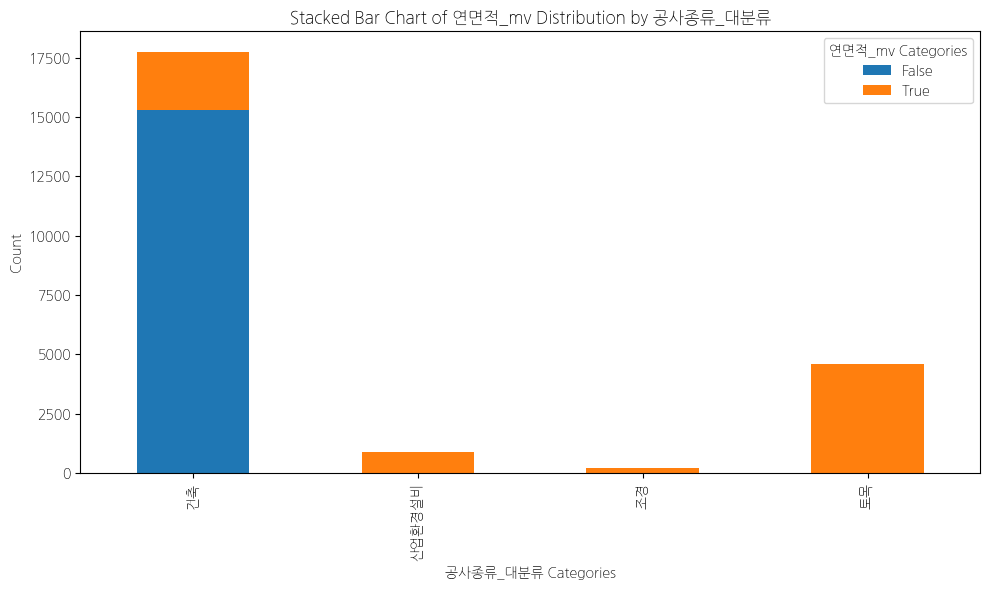

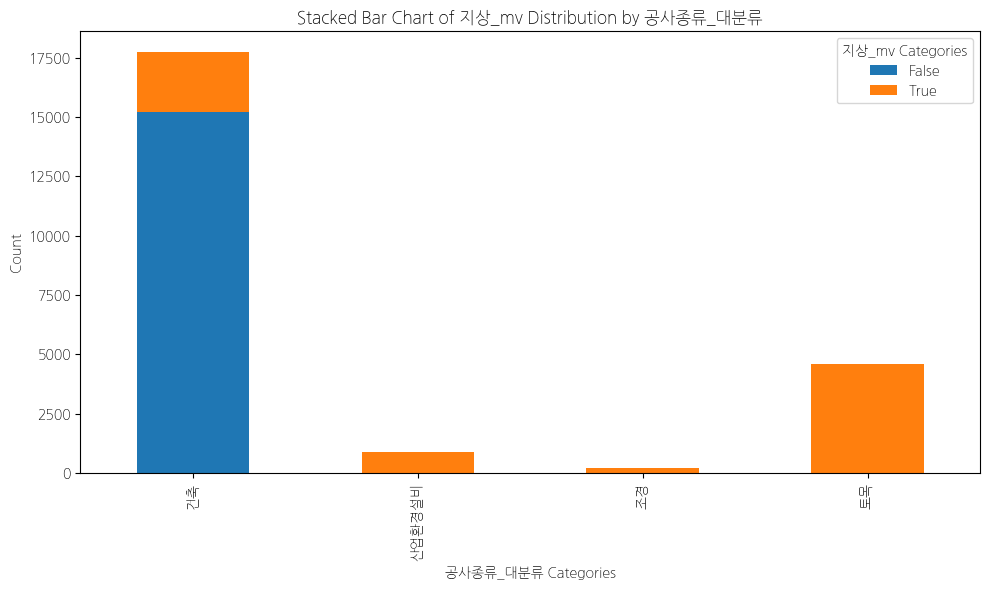

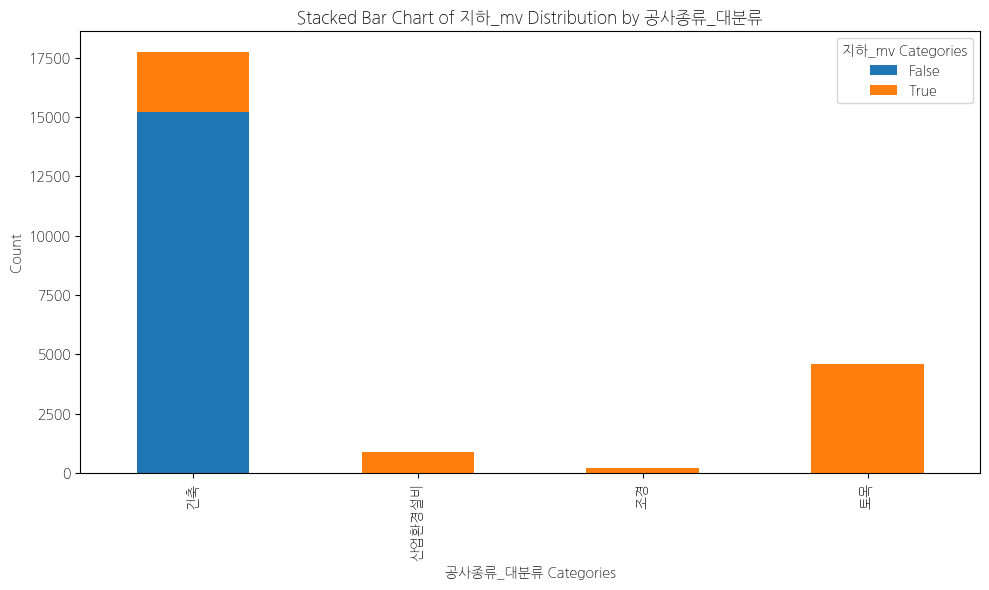

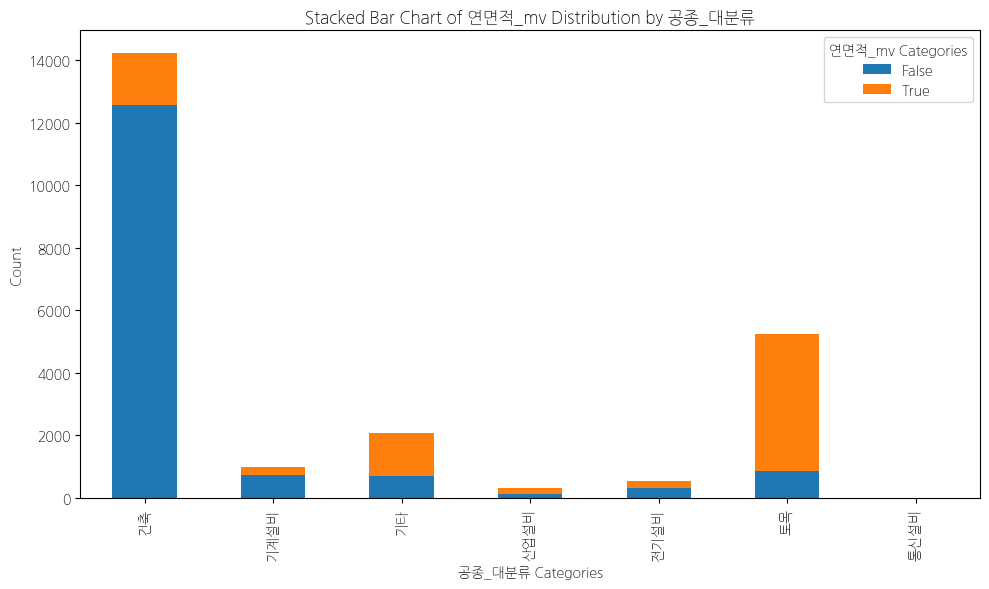

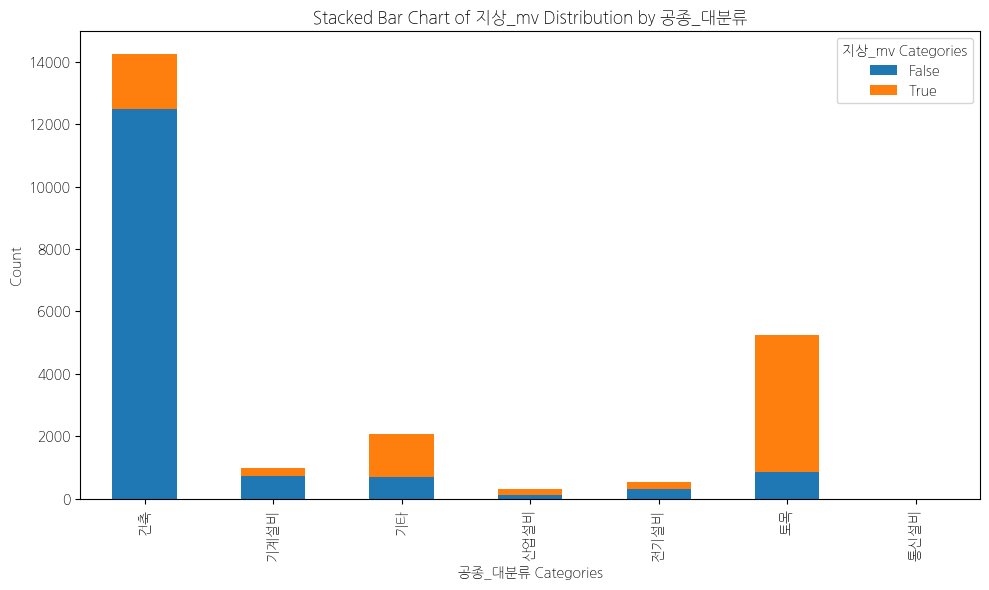

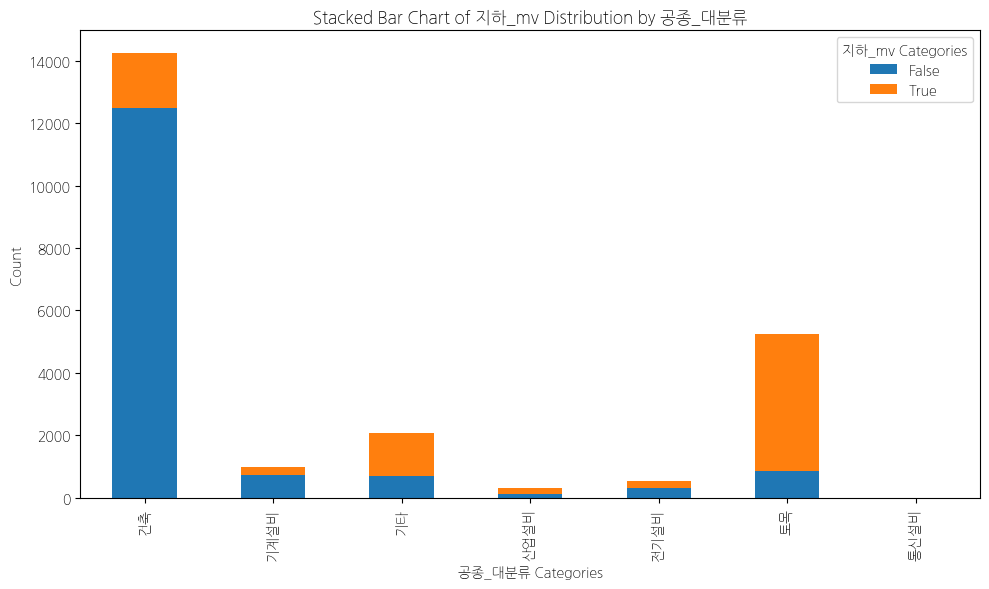

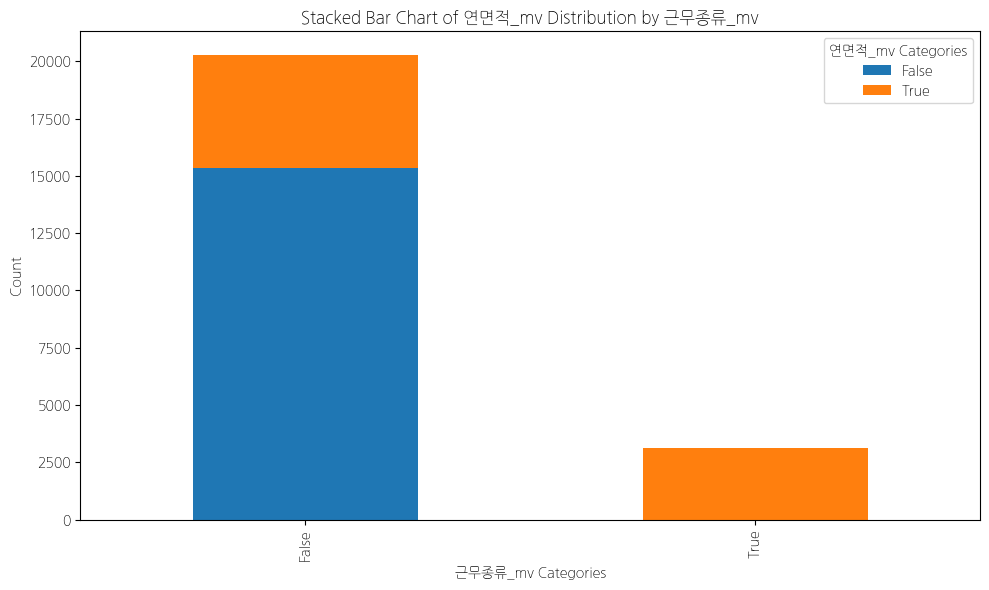

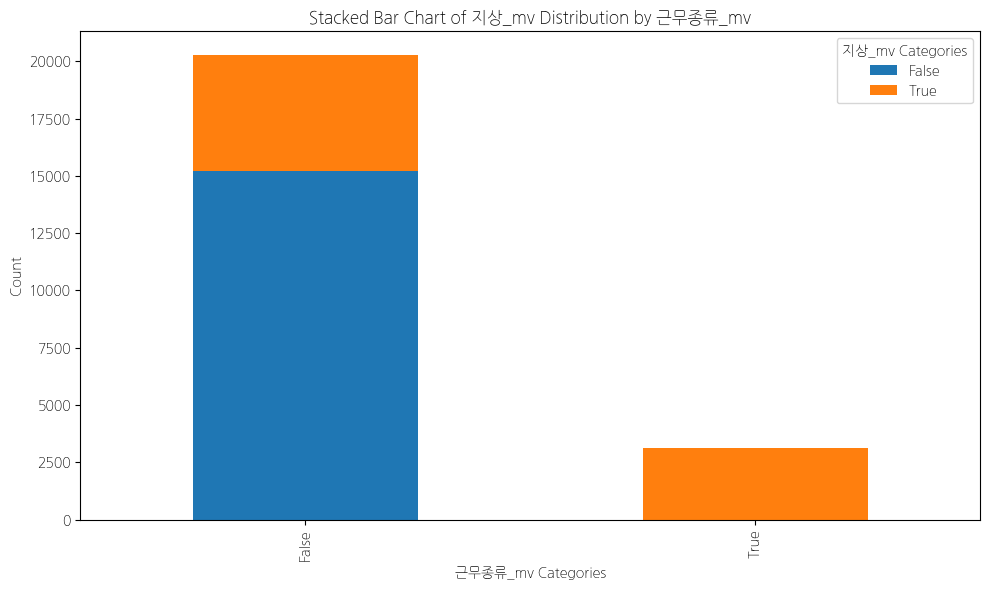

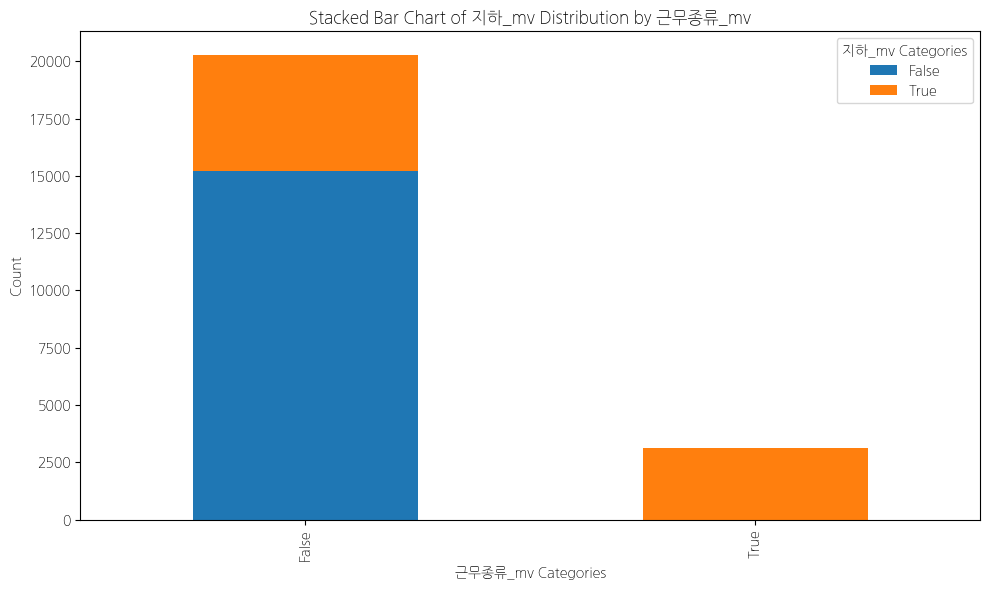

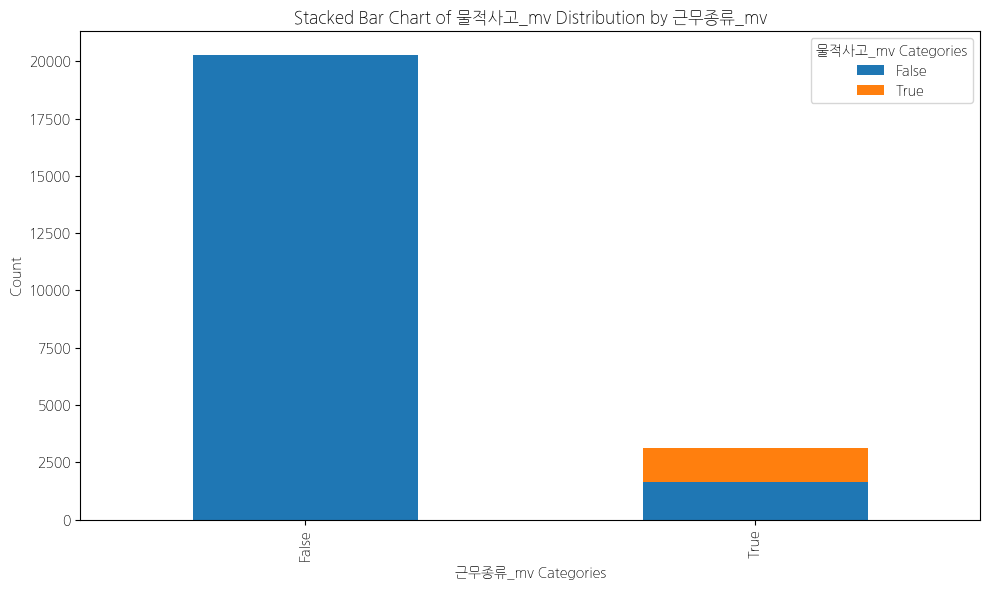

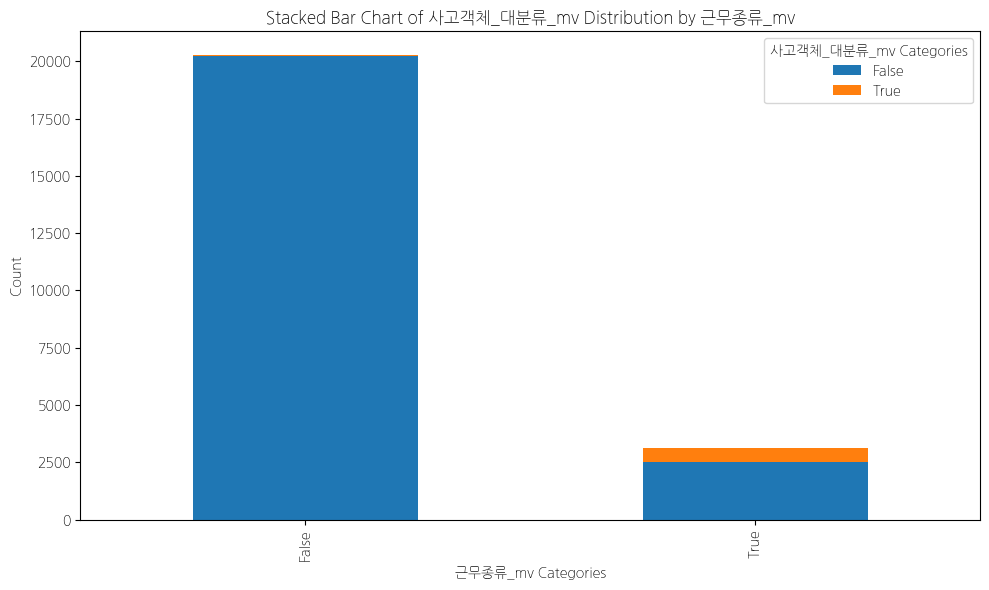

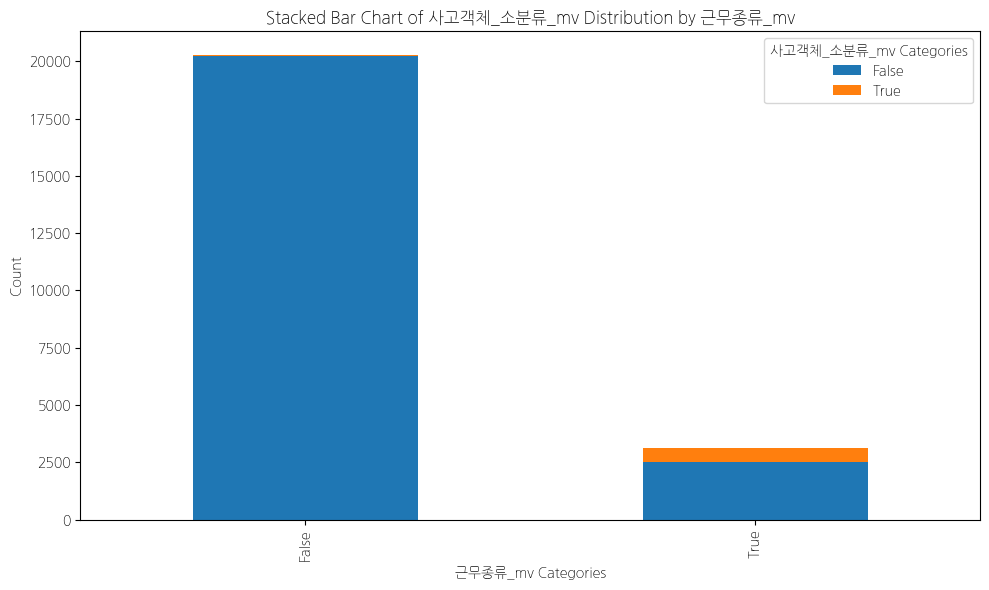

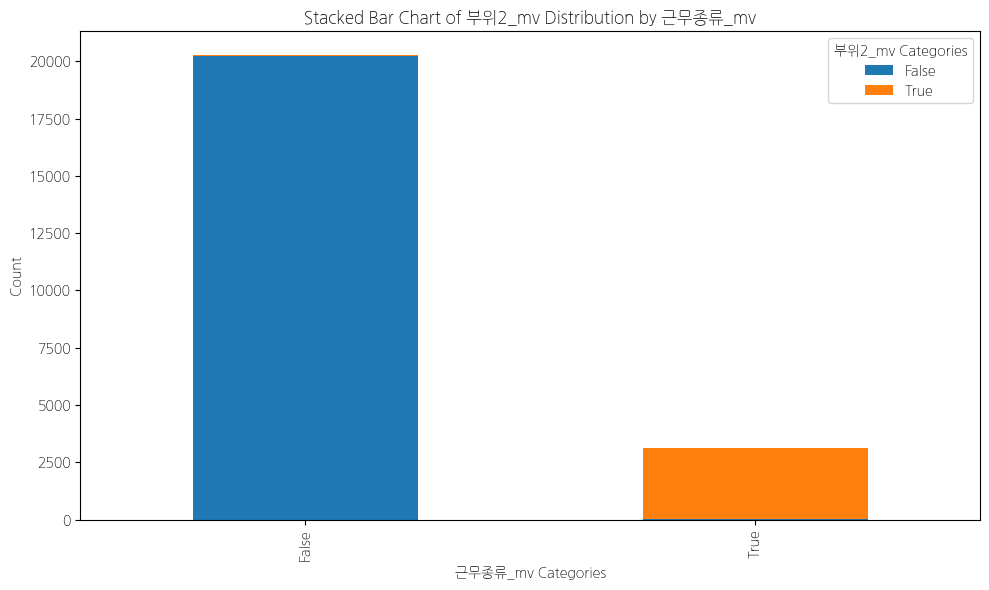

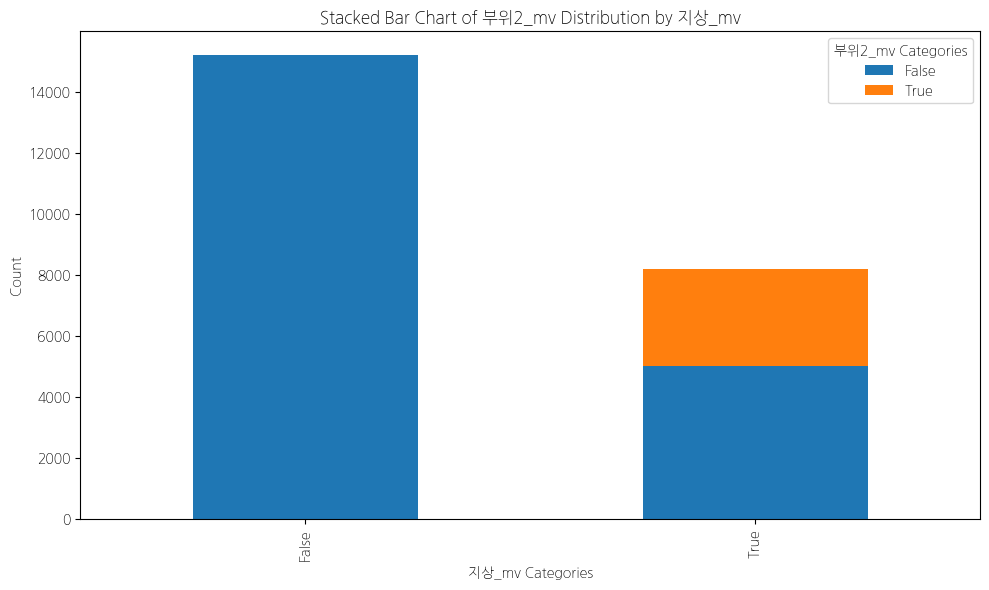

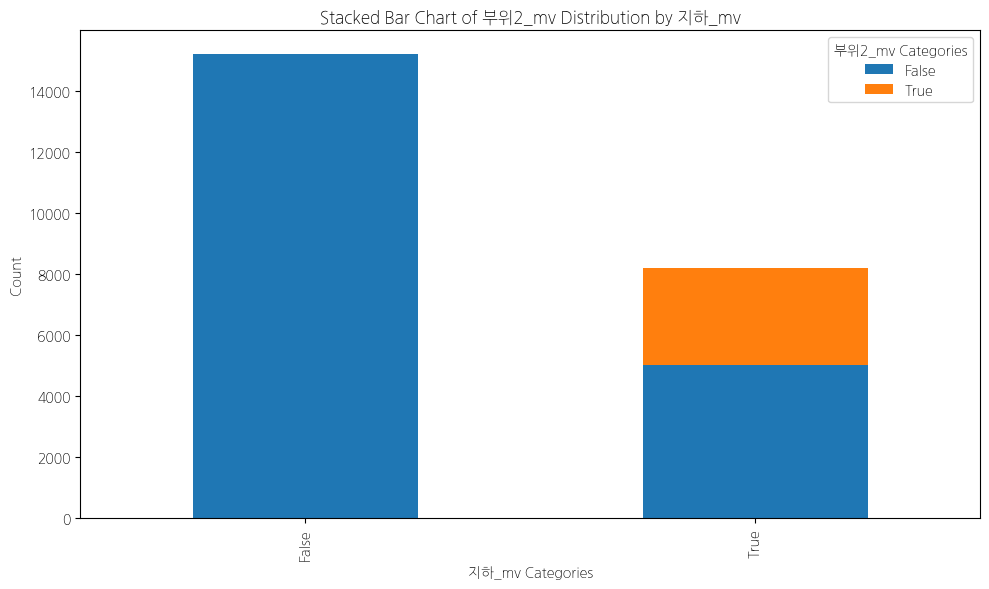

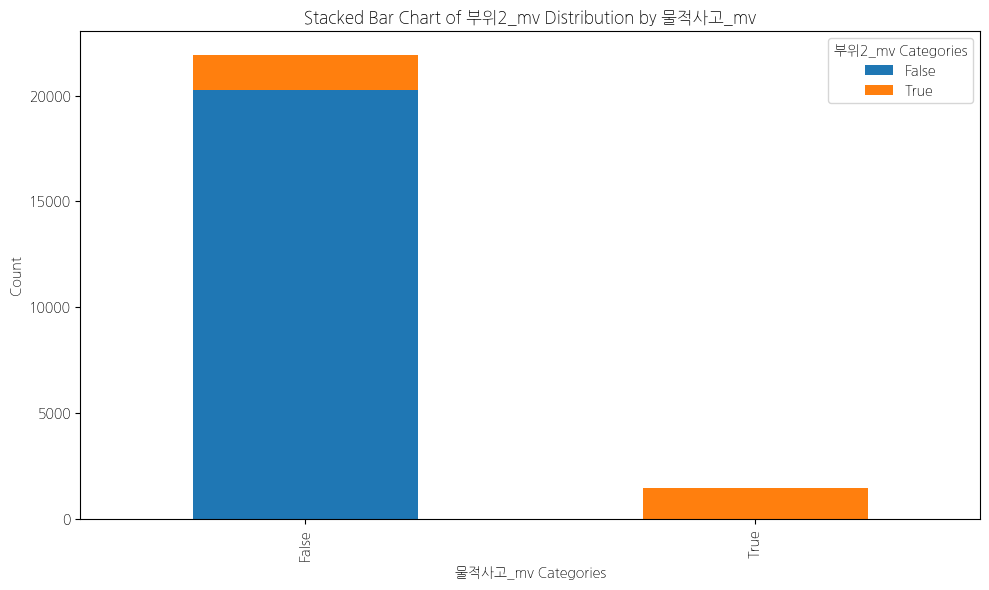

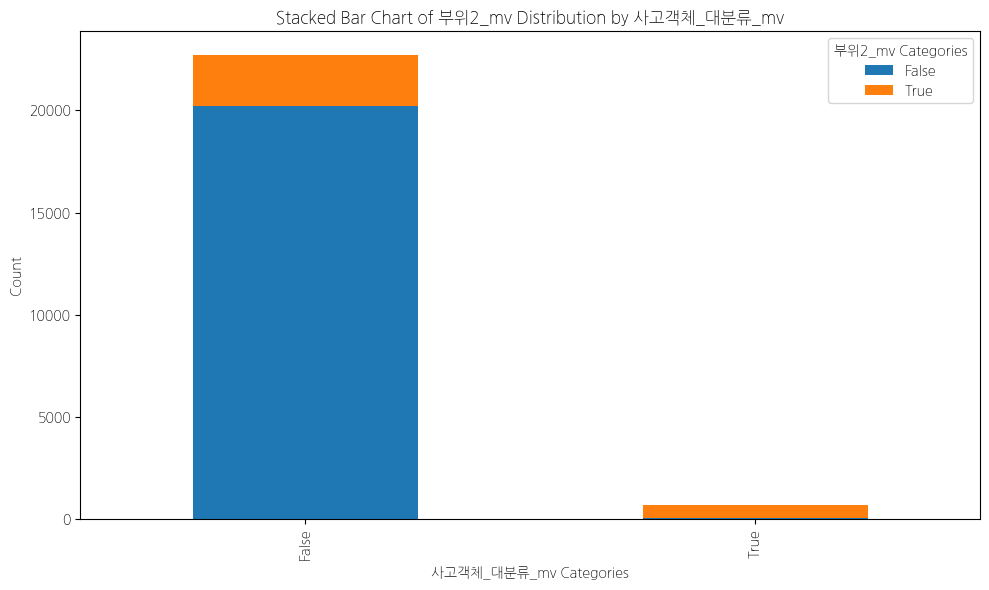

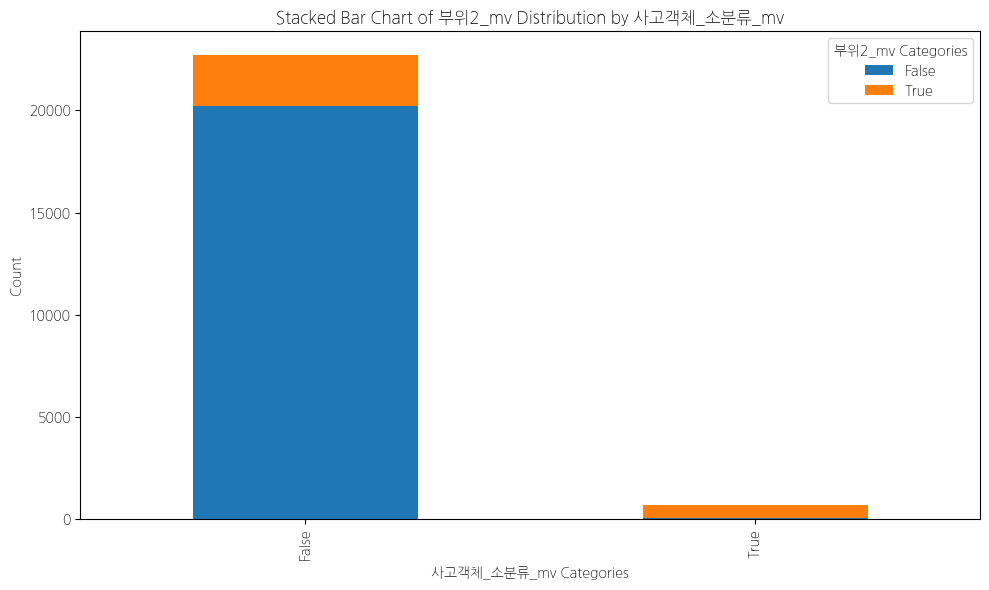

In [133]:
for i,j in associated:
    plot_stacked_bar(mvcat[i], mvcat[j])
    # plot_categorical_relationship(mvcat[j], mvcat[i])

반복분과 가설검정을 통해 케이스를 추린 후 데이터 분포 관찰하였으나

특정 col 결측에 따라 다른 col의 분포가 다르더라도, 결측이기 때문에 우연한 연관성일 확률이 높아보임. 특정 데이터로 전부 설명이 될 수 있는 케이스를 찾아야할 것으로 보이며 찾더라도 별 도움이 될 것 같지 않음

In [ ]:
train_cat = train[['시간대', '계절', '근무종류', '날씨', '공사종류_대분류', '공사종류_중분류', '공사종류_소분류', '인적사고', '물적사고','공종_대분류', '공종_소분류', '사고객체_대분류', '사고객체_소분류', '작업프로세스', '장소', '부위2']]
train_mv = train_cat.isna()
train_mv.columns = [x + "_mv" for x in train_mv.columns]
train_mv = pd.concat([train_cat, train_mv], axis=1)
train_mv = train_mv.astype(str)

In [ ]:
res = []
for col in train_mv.columns:
    for cat in train_mv[col].dropna().unique():
        print(col, cat)
        for col_ in train_mv.columns:
            if col in col_:
                continue
            a = len(train_mv[train_mv[col] == cat][col_].unique())
            if a == 1:
                b = len(train_mv[train_mv[col] == cat][col_])
                c = train_mv[train_mv[col] == cat][col_].unique()[0]
                d = len(train_mv[train_mv[col] == c])
                if c == d:
                    res.append((col, cat, col_, c))

시간대 아침
시간대 낮
시간대 저녘
시간대 nan
계절 겨울
계절 가을
계절 여름
계절 봄
근무종류 정규작업
근무종류 휴일근무
근무종류 연장근무
근무종류 기타
근무종류 식사ㆍ휴식 등
근무종류 작업 전
근무종류 출ㆍ퇴근 등
근무종류 불류불능
근무종류 nan
날씨 맑음
날씨 흐림
날씨 강설
날씨 강우
날씨 안개
날씨 강풍
공사종류_대분류 건축
공사종류_대분류 토목
공사종류_대분류 조경
공사종류_대분류 산업환경설비
공사종류_중분류 건축물
공사종류_중분류 터널
공사종류_중분류 하천
공사종류_중분류 공원
공사종류_중분류 상하수도
공사종류_중분류 발전시설
공사종류_중분류 기타
공사종류_중분류 항만
공사종류_중분류 도로
공사종류_중분류 철도
공사종류_중분류 교량
공사종류_중분류 숲
공사종류_중분류 환경시설
공사종류_중분류 옹벽 및 절토사면
공사종류_중분류 산업생산시설
공사종류_중분류 공동구
공사종류_중분류 댐
공사종류_중분류 정원
공사종류_중분류 None
공사종류_중분류 생태공원
공사종류_중분류 수목원
공사종류_소분류 근린생활시설
공사종류_소분류 철도터널
공사종류_소분류 업무시설
공사종류_소분류 기타
공사종류_소분류 공동주택
공사종류_소분류 교육연구시설
공사종류_소분류 None
공사종류_소분류 도로터널
공사종류_소분류 노유자시설
공사종류_소분류 창고시설
공사종류_소분류 공장
공사종류_소분류 문화 및 집회시설
공사종류_소분류 방송통신시설
공사종류_소분류 부지조성
공사종류_소분류 하수도
공사종류_소분류 상수도
공사종류_소분류 자동차 관련시설
공사종류_소분류 수련시설
공사종류_소분류 도로
공사종류_소분류 운동시설
공사종류_소분류 숙박시설
공사종류_소분류 동물 및 식물 관련시설
공사종류_소분류 의료시설
공사종류_소분류 철도교량
공사종류_소분류 도로교량
공사종류_소분류 판매시설
공사종류_소분류 운수시설
공사종류_소분류 단독주택
공사종류_소분류 방파제
공사종류_소분류 종교시설
공사종류_소분류 수처리설비시설
공사종류_소분류 지하철
공사종류_소분류 호안
공사종류_소분류 제방(통관/호안)

In [ ]:
res

[]

- 서로 다른 카테고리기리 1:1 매칭되는 경우 없음

# 결과

### 결과 정리

- 결측관련
    - 근무종류 : 기타는 결측 처리 필요. 다른 카테고리에 속하지 않는다는 정보 가지고 현재 할 수 있는게 없음
    - 공사종류_중분류 : 기타는 결측 처리 필요. 다른 카테고리에 속하지 않는다는 정보 가지고 현재 할 수 있는게 없음
    - 공사종류_소분류 : 기타는 결측 처리 필요. 다른 카테고리에 속하지 않는다는 정보 가지고 현재 할 수 있는게 없음
    - 연면적, 지상, 지하 전부 0인 경우 존재, 이 케이스만 결측처리
    - 인적사고 : 기타, 분류불능 결측처리
    - 물적사고 : 기타 결측처리
    - 공종_대분류 : 기타 결측처리
    - 공종_소분류 : 기타 결측처리
    - 사고객체_대분류 : 기타 결측처리
    - 사고객체_소분류 : 기타 결측처리
    - 작업프로세스 : 기타 결측처리
    - 장소 : string 내 /, 기타 지우기
    - 부위1 : drop col
- 그 외
    - 사고인지 시간 : feature engineering에서 사고 인지시간과 조치내용의 연관성을 확인해보면 좋을 듯. 너무 늦게 발견할 경우 따로 조치가 필요할 것으로 보이므로
    - 부위2 : 추가분석 필요


### 의견

- 결측치 관련 변수간 연관성 보이지 않음

### 향후 계획

- 전처리 함수 적용, 프롬프트 엔지니어링 후 실험
- 결과 저장 함수
- ablation study(가장 비중이 클 것으로 보이는 참조docs 줄이고 프롬프트 줄이기)